## Notebook for Figs. 2, 5 and 6 of the paper

Sets 0, 1, and 2 are the 2, 5, and 7-parameter models. The MCMC samples from the GW170817 analysis can be downloaded from the Zenodo repository

In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import pickle
import scipy 
from tqdm import tqdm
import seaborn 
import pandas as pd


sets=['s0','s1','s2']

samples = {}

for case in sets:

    samples[case] = np.loadtxt('GW170817/samples_'+str(case)+'.dat')


The Likelihood weights from the NICER analyses (which can be found in the "NICER" folder) can be changed to create Figs. 5 or 6, instead of Fig. 2

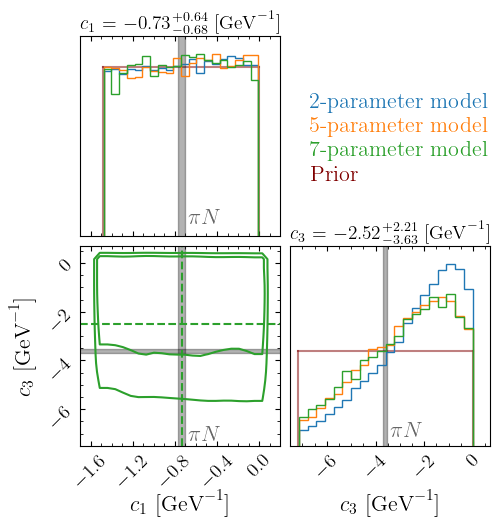

In [2]:
from matplotlib import cm, colors
import matplotlib
plt.rcParams['text.usetex'] = True

fontsize = 16

labels=[r'$c_1 \ \textrm{[GeV}^{-1}\textrm{]}$',r'$c_3 \ \textrm{[GeV}^{-1}\textrm{]}$']
titles=[r'$c_1$',r'$c_3$']

######

hist_kwargs = {'density':True,'color':'C0','zorder':2}

L_J0030 = np.loadtxt('NICER/weights_2params_J0030.dat')
L_J0740 = np.loadtxt('NICER/weights_2params_J0740.dat')
L_J0437 = np.loadtxt('NICER/weights_2params_J0437.dat')

weights = L_J0030 * L_J0740 * L_J0437 

figure = corner.corner(samples['s0'][:,2:4],color='C0',hist_kwargs=hist_kwargs,weights=weights,
                      plot_datapoints=False,plot_density=False,plot_contours=False,bins = 20,
                      labels=labels,show_titles=False)


######

hist_kwargs = {'density':True,'color':'C1','zorder':3}

L_J0030 = np.loadtxt('NICER/weights_5params_J0030.dat')
L_J0740 = np.loadtxt('NICER/weights_5params_J0740.dat')
L_J0437 = np.loadtxt('NICER/weights_5params_J0437.dat')

weights = L_J0030 * L_J0740 * L_J0437  


corner.corner(samples['s1'][:,2:4],color='C1', fig=figure,hist_kwargs=hist_kwargs,weights=weights,
              plot_datapoints=False,plot_density=False,plot_contours=False,bins = 20,
              labels=labels,show_titles=False)



######


hist_kwargs = {'density':True,'color':'C2','zorder':4}

L_J0030 = np.loadtxt('NICER/weights_7params_J0030.dat')
L_J0740 = np.loadtxt('NICER/weights_7params_J0740.dat')
L_J0437 = np.loadtxt('NICER/weights_7params_J0437.dat')

weights = L_J0030 * L_J0740 * L_J0437 

corner.corner(samples['s2'][:,2:4],color='C2', fig=figure,hist_kwargs=hist_kwargs,levels=(0.68,0.9),weights=weights,
              plot_density=False,plot_contours=True,bins = 20,
              title_quantiles=(0.05,0.5,0.95),
              labels=labels,show_titles=True,
              titles=titles,
              plot_datapoints=False,smooth = 1.5,title_kwargs=dict(fontsize=fontsize),label_kwargs=dict(fontsize=fontsize),
              labelpad=-0.08)



######

figure.axes[3].plot( np.linspace(-3.58*2,0), 1./(3.61*2)*np.ones(50),color='maroon',alpha = 0.5,zorder=1)
figure.axes[3].plot( [-3.58*2,-3.58*2] , [0,1./(3.61*2)] ,color='maroon' ,alpha = 0.5,zorder=1)
figure.axes[3].plot( [0,0] , [0,1./(3.61*2)] ,color='maroon' ,alpha = 0.5,zorder=1)

figure.axes[0].plot( np.linspace(-0.74*2,0), 1./(0.74*2)*np.ones(50),color='maroon',alpha = 0.5,zorder=1)
figure.axes[0].plot( [-0.74*2,-0.74*2] , [0,1./(0.74*2)] ,color='maroon' ,alpha = 0.5,zorder=1)
figure.axes[0].plot( [0,0] , [0,1./(0.74*2)] ,color='maroon' ,alpha = 0.5,zorder=1)


figure.axes[2].set_ylim(top = 0.7,bottom = -7.5)
figure.axes[2].set_xlim(left = -1.7,right = 0.2)
figure.axes[0].set_xlim(left = -1.7,right = 0.2)
figure.axes[3].set_xlim(right = 0.7, left = -7.5)


figure.axes[2].axvline(float(figure.axes[0].get_title()[10:15]),color='C2',linestyle='dashed')
figure.axes[2].axhline(float(figure.axes[3].get_title()[10:15]),color='C2',linestyle='dashed')


figure.axes[0].minorticks_on()
figure.axes[1].minorticks_on()
figure.axes[2].minorticks_on()
figure.axes[3].minorticks_on()

figure.axes[0].tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True,labelsize=fontsize-2)
figure.axes[1].tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True,labelsize=fontsize-2)
figure.axes[2].tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True,labelsize=fontsize-2)
figure.axes[3].tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True,labelsize=fontsize-2)

figure.axes[2].fill_between(x=np.linspace(-2,2),y1=-3.61+0.05*1.645,y2=-3.61-0.05*1.645,color='black',alpha=0.3)
figure.axes[2].fill_betweenx(y=np.linspace(-8,1),x1=-0.74+0.02*1.645,x2=-0.74-0.02*1.645,color='black',alpha=0.3)

figure.axes[0].fill_betweenx(y=np.linspace(-8,1),x1=-0.74+0.02*1.645,x2=-0.74-0.02*1.645,color='black',alpha=0.3)
figure.axes[3].fill_betweenx(y=np.linspace(-8,1),x1=-3.61+0.05*1.645,x2=-3.61-0.05*1.645,color='black',alpha=0.3)

#figure.axes[1].text(0.1,0.9,r'$\textrm{Reanalysis II}$',color='black',fontsize=fontsize)
#figure.axes[1].text(0.1,0.8,r'$\textrm{(J0030 PDT-U)}$',color='black',fontsize=fontsize)


figure.axes[1].text(0.1,0.64,r'$\textrm{2-parameter model}$',color='C0',fontsize=fontsize)
figure.axes[1].text(0.1,0.52,r'$\textrm{5-parameter model}$',color='C1',fontsize=fontsize)
figure.axes[1].text(0.1,0.40,r'$\textrm{7-parameter model}$',color='C2',fontsize=fontsize)
figure.axes[1].text(0.1,0.28,r'$\textrm{Prior}$',color='maroon',fontsize=fontsize)

figure.axes[0].text(-0.68,0.05,r'$\pi N $',color='black',alpha=0.6,fontsize=fontsize)
figure.axes[2].text(-0.68,-7.25,r'$\pi N $',color='black',alpha=0.6,fontsize=fontsize)
figure.axes[3].text(-3.4,0.015,r'$\pi N $',color='black',alpha=0.6,fontsize=fontsize)

figure.axes[0].set_title(  figure.axes[0].get_title()+r' $\textrm{[GeV}^{-1}\textrm{]}$',fontsize=fontsize-2)
figure.axes[3].set_title(  figure.axes[3].get_title()+r' $\textrm{[GeV}^{-1}\textrm{]}$',fontsize=fontsize-2)

plt.savefig('figures/Present.pdf',bbox_inches='tight')


Finally, the following cell extracts and stores the source data from the figure 

In [3]:
ndim = samples['s0'][:,2:4].shape[1]

with open('source_data/fig2.txt', "w") as f:
    for i in range(ndim):
        for j in range(i + 1):
            ax = figure.axes[i * ndim + j]
            if i == j:
                f.write(f"1D Histogram for {labels[i]}\n")
                f.write("X\tY\n")
                for patch in ax.patches:
                    if isinstance(patch, plt.Polygon):
                        verts = patch.get_xy()
                        for x, y in verts:
                            f.write(f"{x:.6f}\t{y:.6f}\n")
                        f.write("\n")